<a href="https://colab.research.google.com/github/tomohiko-urai/minnano_ai/blob/master/05_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# フィルター

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [ ]:
!wget https://storage.googleapis.com/iotcolab2023/strawberry1.jpg -O a.jpg
!wget https://storage.googleapis.com/iotcolab2023/strawberry2.jpg -O b.jpg
!wget https://storage.googleapis.com/iotcolab2023/strawberry3.jpg -O c.jpg

--2023-02-11 01:47:44--  https://storage.googleapis.com/iotcolab2023/strawberry1.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121456 (119K) [image/jpeg]
Saving to: ‘a.jpg’

a.jpg               100%[===================>] 118.61K  --.-KB/s    in 0.001s  

2023-02-11 01:47:44 (80.0 MB/s) - ‘a.jpg’ saved [121456/121456]

--2023-02-11 01:47:44--  https://storage.googleapis.com/iotcolab2023/strawberry2.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253922 (248K) [image/jpeg]
Saving to: ‘b.jpg’

b.jpg               100%[===================>] 2

In [ ]:
#@title 関数定義：ヒストグラム表示

def getHistogram(img):
  if len(img.shape) == 3:
    # カラーのとき
    channels = 3
  else:
    # モノクロのとき
    channels = 1

  histogram = []
  for ch in range(channels):
    # チャンネル(B, G, R)ごとのヒストグラム
    hist_ch = cv2.calcHist([img], [ch], None, [256], [0, 256])
    histogram.append(hist_ch[:,0])

  # チャンネルごとのヒストグラムを返す
  return histogram

def drawHistogram(hist, axs, title, label):
  # チャンネル数
  ch = len(hist)

  # グラフの表示色
  if (ch == 1):
    colors = ["black"]
  else:
    colors = ["blue", "green", "red"]

  # ヒストグラムをmatplotlibで表示
  x = range(256)
  for col in range(ch):
    y = hist[col]
    axs.plot(x, y, color = colors[col], label = label[col])

  axs.set_title(title)

  # 凡例の表示
  axs.legend(loc = 2)

In [ ]:
#@title 関数定義：データのプロット

# カラーのプロット
def bgrPlot(bgr, title):
  # BGRカラーをRGBカラーへ変換する
  rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

  # 画像のプロット
  px = 1/plt.rcParams['figure.dpi']
  fig, axs = plt.subplots(1, 2, figsize=(1024*px, 384*px))
  axs[0].imshow(rgb), axs[0].set_title(title)
  # ヒストグラム
  hist = getHistogram(bgr)
  drawHistogram(hist, axs[1], 'BGR', ["B", "G", "R"])


# グレースケール
def grayPlot(gray, title):
  # 画像のプロット
  px = 1/plt.rcParams['figure.dpi']
  fig, axs = plt.subplots(1, 2, figsize=(1024*px, 384*px))
  axs[0].imshow(gray, cmap='gray'), axs[0].set_title(title)
  # ヒストグラム
  hist = getHistogram(gray)
  drawHistogram(hist, axs[1], 'grayscale', ["mono"])

In [ ]:
filename = 'a' #@param ["a", "b", "c"]

img = cv2.imread(filename + '.jpg')

# img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS_FULL)
# img_bin = cv2.adaptiveThreshold (img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

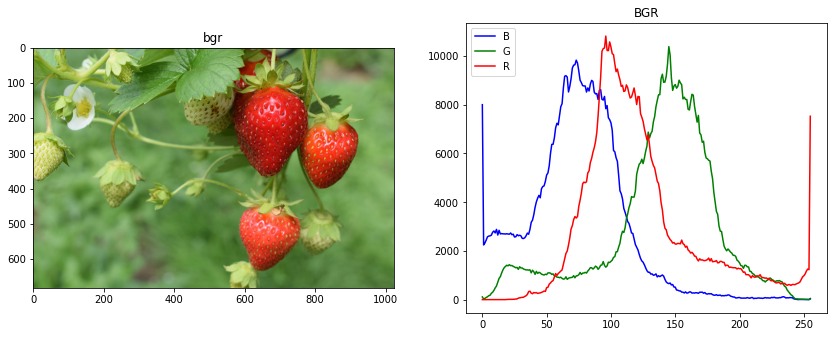

In [ ]:
#@title 元画像

# # BGRカラーをRGBカラーへ変換する
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 画像のプロット
bgrPlot(img, 'bgr')

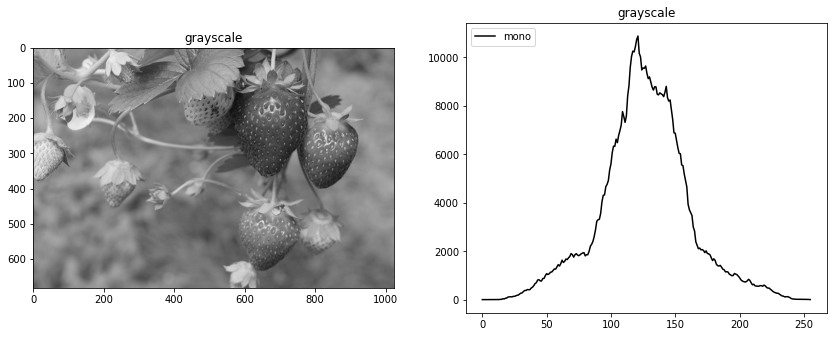

In [ ]:
#@title グレースケール変換

# 元画像（BGRカラー）をグレースケールへ変換する
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 画像のプロット
grayPlot(img_gray, 'grayscale')

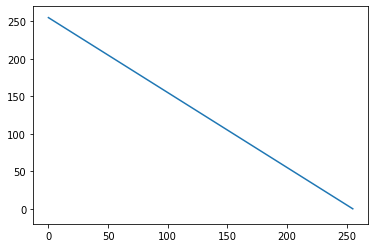

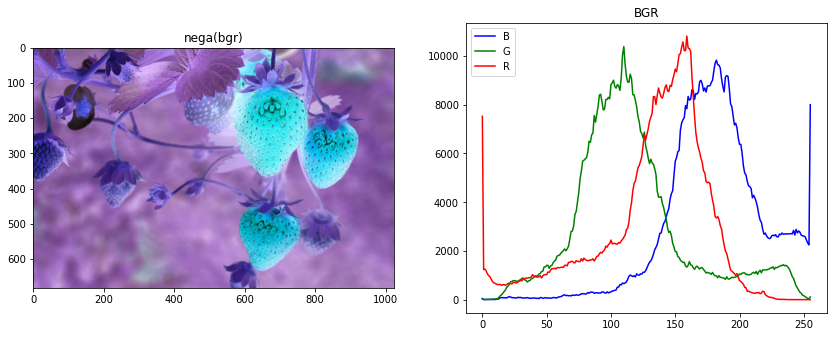

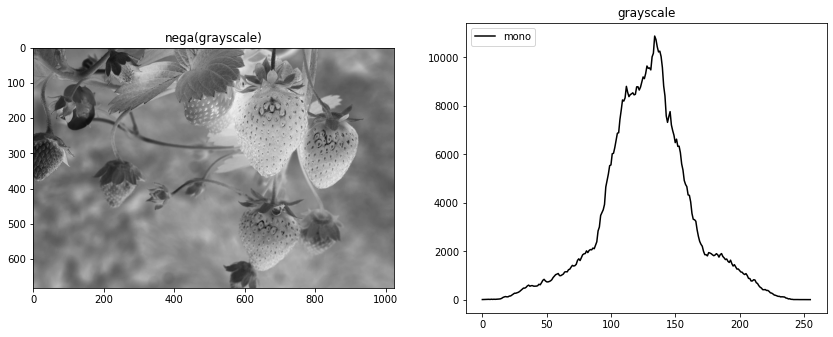

In [ ]:
#@title ネガ

# 変換テーブルの作成
filter = np.arange(256)
filter = 255 - filter

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()


# カラーを反転する
img_nega_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_nega_bgr, 'nega(bgr)')


# グレースケールを反転する
img_nega_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_nega_gray, 'nega(grayscale)')

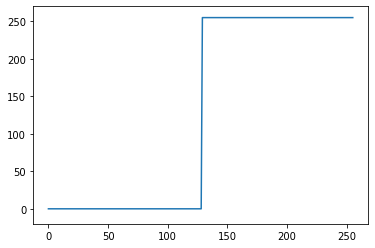

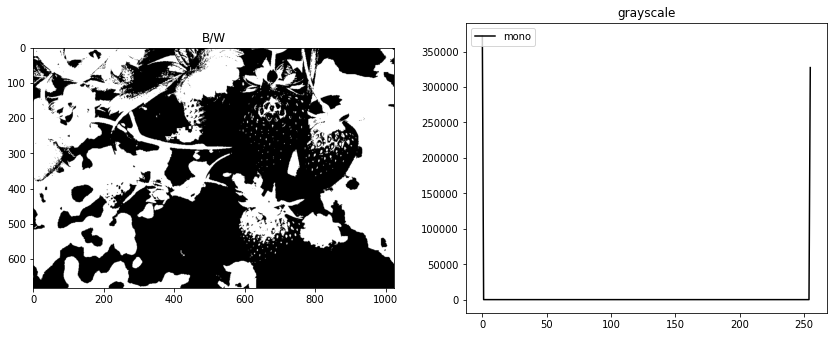

In [ ]:
#@title 2値化 { run: "auto" }

# パラメータのフォーム
threshhold = 128 #@param {type:"slider", min:0, max:255, step:1}

# 変換テーブルの作成
filter = np.where(np.arange(256) <= threshhold, 0, 255)

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()

# グレースケールを２値化
img_bin = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_bin, 'B/W')

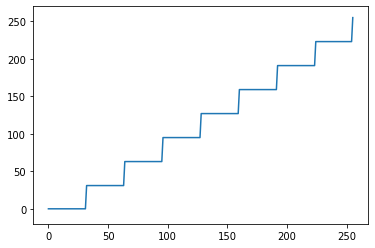

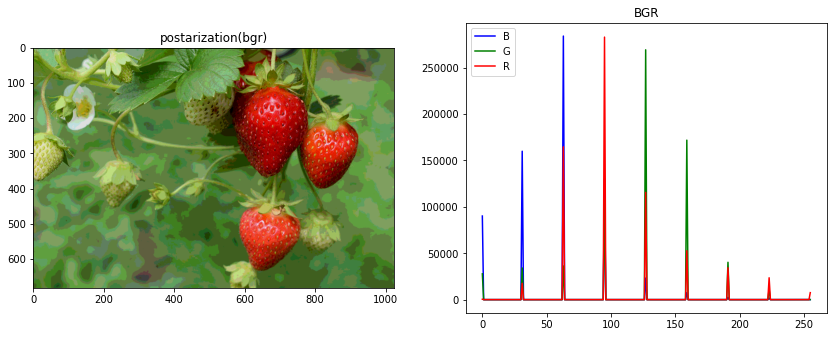

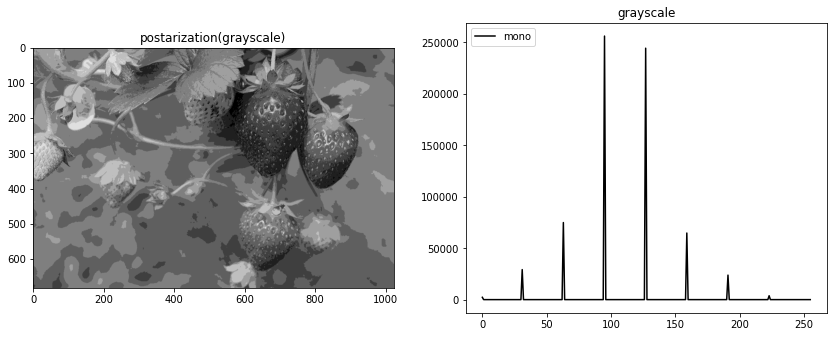

In [ ]:
#@title ポスタリゼーション（諧調数を減らす） { run: "auto" }

# パラメータのフォーム
n = 8 #@param {type:"slider", min:1, max:100, step:1}

# 変換テーブルの作成
bins = np.linspace(0, 255, n + 1)
filter = np.array([bins[i - 1] for i in np.digitize(np.arange(256), bins)]).astype(int)

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()


# カラーのポスタリゼーション
img_posta_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_posta_bgr, 'postarization(bgr)')


# グレースケールのポスタリゼーション
img_posta_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_posta_gray, 'postarization(grayscale)')

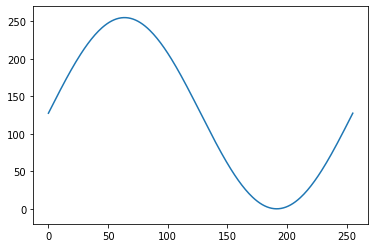

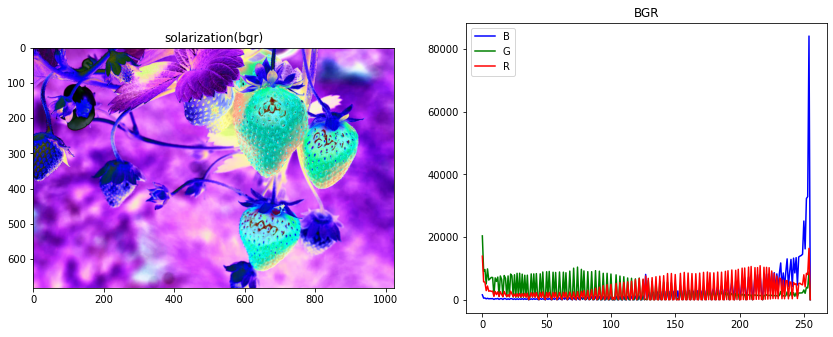

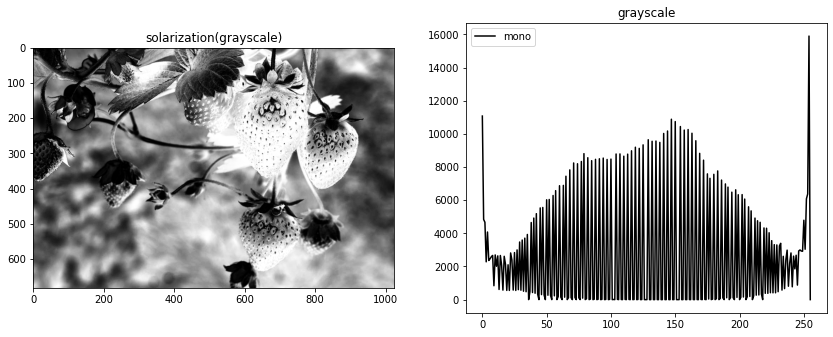

In [ ]:
#@title ソラリゼーション

# 変換テーブルの作成（SINカーブ）
filter = (np.sin(np.arange(256) * 2 * np.pi / 255) + 1) * 255 / 2

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()


# カラーのソラリゼーション
img_solar_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_solar_bgr, 'solarization(bgr)')


# ソラリゼーション
img_solar_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_solar_gray, 'solarization(grayscale)')

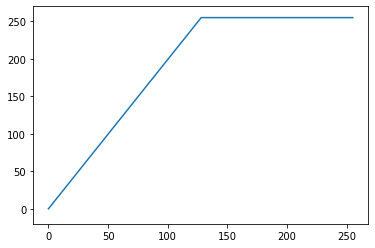

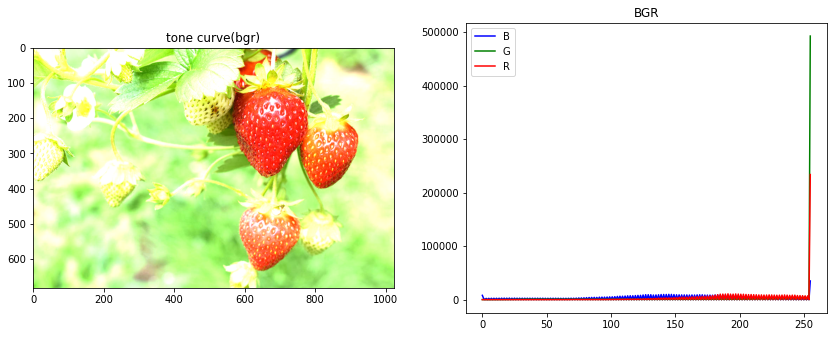

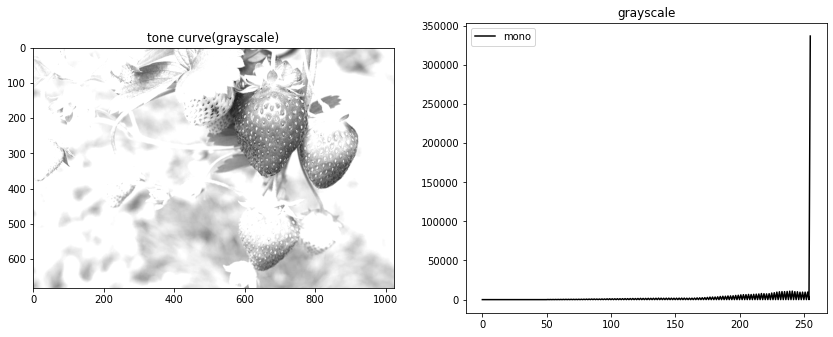

In [ ]:
#@title 折れ線型トーンカーブ { run: "auto" }

# パラメータのフォーム
t = 128 #@param {type:"slider", min:1, max:255, step:1}

# 変換テーブルの作成
filter = np.clip(255 / t * np.arange(256), 0, 255)

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()


# カラー
img_cont_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_cont_bgr, 'tone curve(bgr)')


# グレースケール
img_cont_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_cont_gray, 'tone curve(grayscale)')

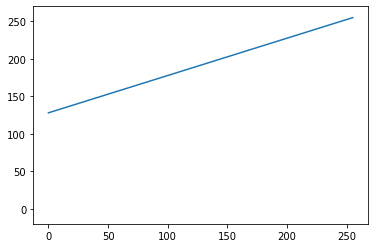

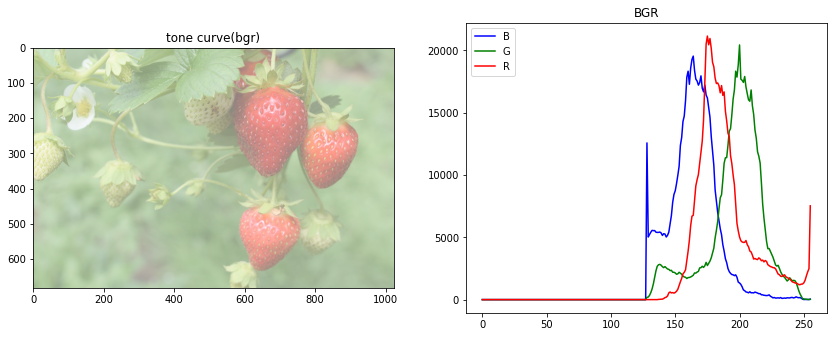

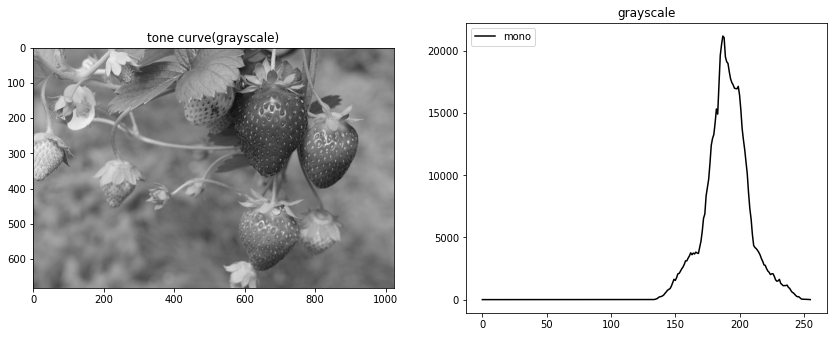

In [ ]:
#@title 折れ線型トーンカーブ { run: "auto" }

# パラメータのフォーム
t = 128 #@param {type:"slider", min:1, max:255, step:1}

# 変換テーブルの作成
x = np.arange(256)
filter = (255 - t) / 255 * np.arange(256) + t

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()


# カラー
img_cont_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_cont_bgr, 'tone curve(bgr)')


# グレースケール
img_cont_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_cont_gray, 'tone curve(grayscale)')

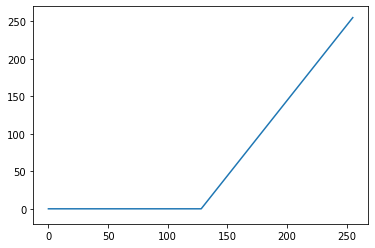

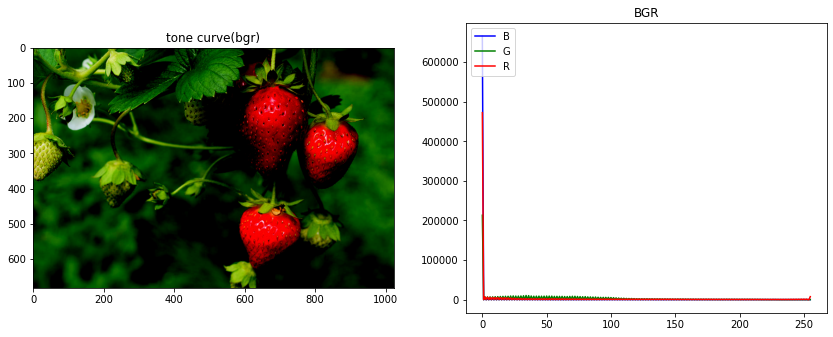

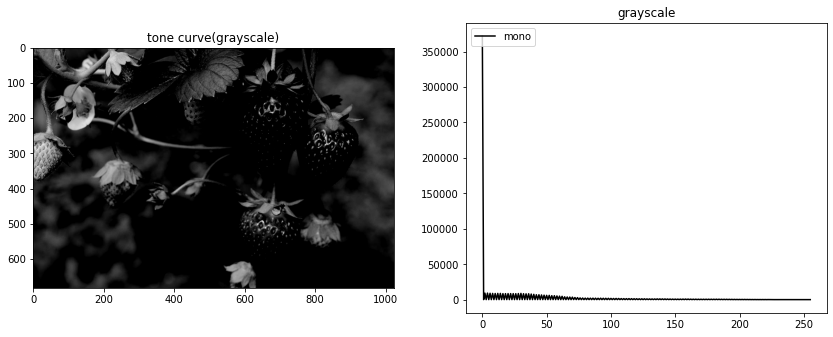

In [ ]:
#@title 折れ線型トーンカーブ { run: "auto" }

# パラメータのフォーム
t = 128 #@param {type:"slider", min:1, max:255, step:1}

# 変換テーブルの作成
filter = np.clip(255 / (255 - t) * np.arange(256) - 255 / (255 - t) * t, 0, 255)

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()


# カラー
img_cont_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_cont_bgr, 'tone curve(bgr)')


# グレースケール
img_cont_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_cont_gray, 'tone curve(grayscale)')

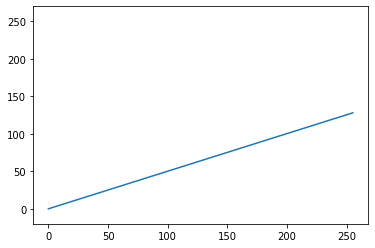

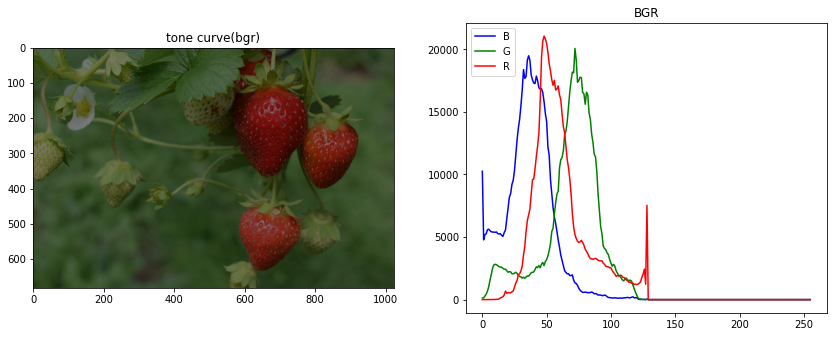

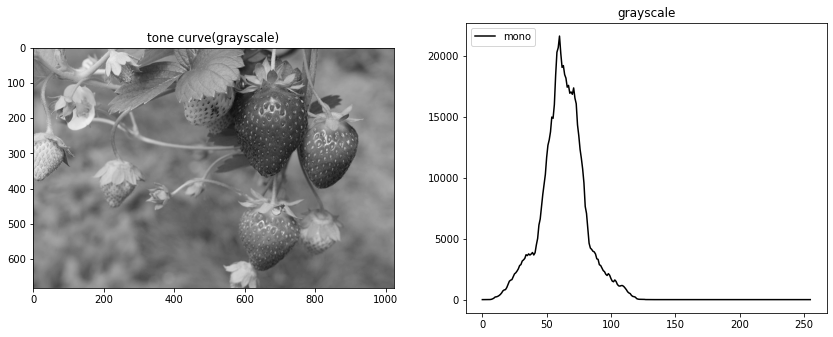

In [ ]:
#@title 折れ線型トーンカーブ { run: "auto" }

# パラメータのフォーム
t = 128 #@param {type:"slider", min:1, max:255, step:1}

# 変換テーブルの作成
filter = t / 255 * np.arange(256)

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()

# カラー
img_cont_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_cont_bgr, 'tone curve(bgr)')


# グレースケール
img_cont_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_cont_gray, 'tone curve(grayscale)')

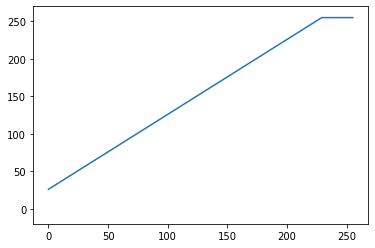

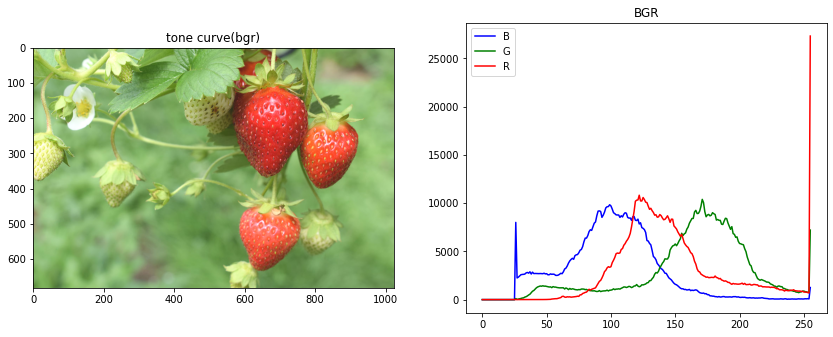

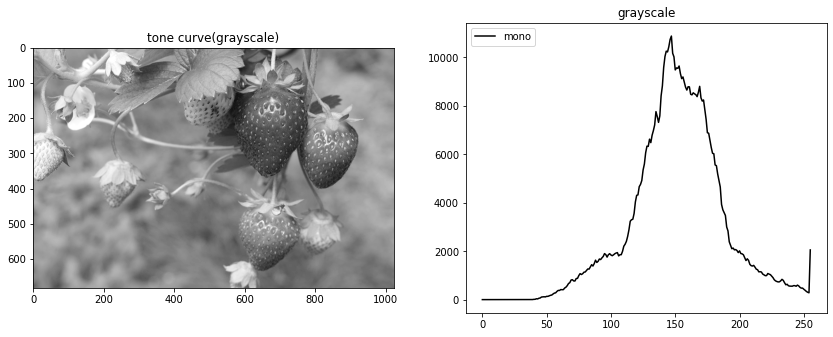

In [ ]:
#@title 明るさ、コントラストの補正 { run: "auto" }

# パラメータのフォーム
alpha = 1 #@param {type:"slider", min:1, max:5, step:1}
beta = 26 #@param {type:"slider", min:0, max:255, step:1}

# 変換テーブルの作成
filter = np.clip(alpha * np.arange(256) + beta, 0, 255)

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()


# カラー
img_cont_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_cont_bgr, 'tone curve(bgr)')


# グレースケール
img_cont_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_cont_gray, 'tone curve(grayscale)')

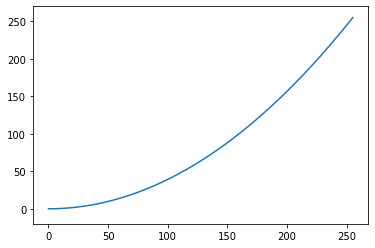

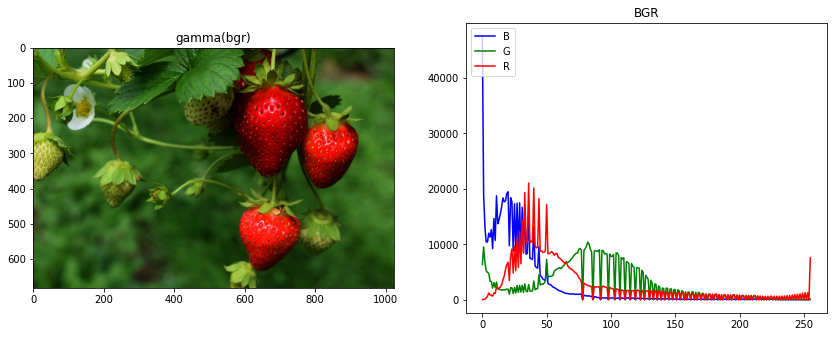

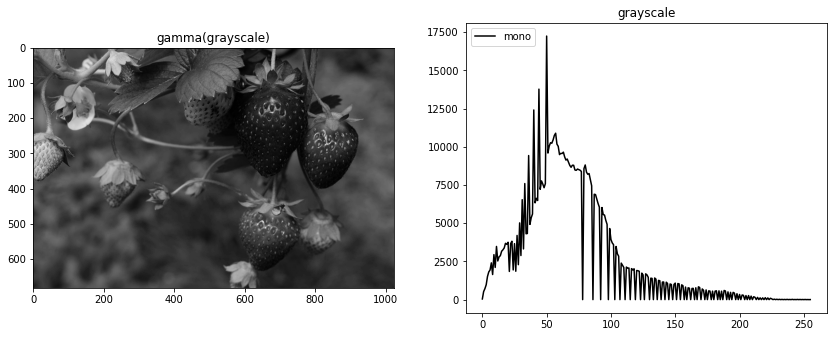

In [ ]:
#@title ガンマ補正 { run: "auto" }

# パラメータのフォーム
gamma = 2 #@param {type:"slider", min:0.1, max:5, step:0.1}

# 変換テーブルの作成
filter = (np.arange(256) / 255) ** gamma * 255

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()


# カラー
img_gamma_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_gamma_bgr, 'gamma(bgr)')


# グレースケール
img_gamma_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_gamma_gray, 'gamma(grayscale)')

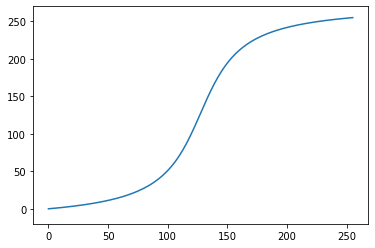

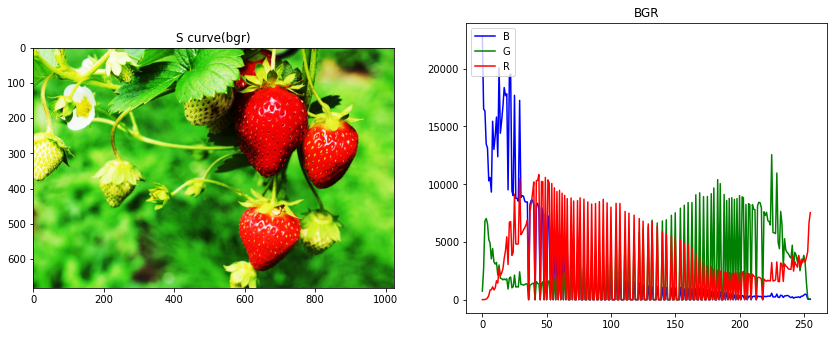

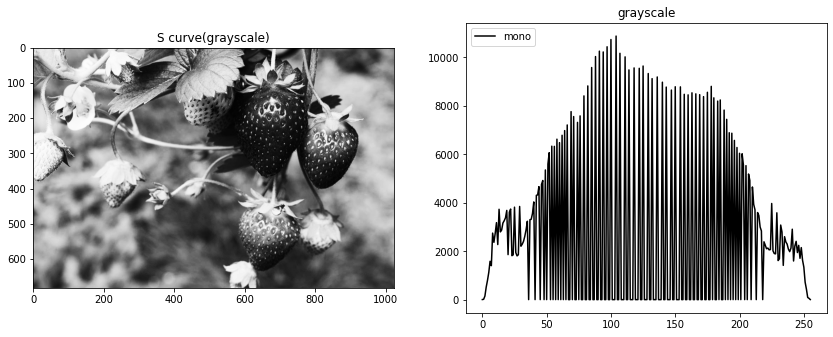

In [ ]:
#@title S 字型トーンカーブ（明るい部分はさらに明るく、暗い部分はより暗くなる） { run: "auto" }

# パラメータのフォーム
t = 5 #@param {type:"slider", min:1, max:5, step:1}

def scale(x):
  return 255 / (x.max() - x.min()) * (x - x.max()) + 255


# 変換テーブルの作成
filter = np.arctan(np.linspace(-t, t, 256))
filter = scale(filter)

# 変換テーブルのプロット
plt.ylim(-20, 270)
plt.plot(filter)
plt.show()


# カラー
img_curve_bgr = cv2.LUT(img, filter).astype(np.uint8)

# 画像のプロット
bgrPlot(img_curve_bgr, 'S curve(bgr)')


# グレースケール
img_curve_gray = cv2.LUT(img_gray, filter).astype(np.uint8)

# 画像のプロット
grayPlot(img_curve_gray, 'S curve(grayscale)')